In [10]:
!pip install tensorflow

  Using cached tensorflow-2.12.0-cp38-cp38-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp38-cp38-win_amd64.whl (272.8 MB)


ERROR: Could not install packages due to an EnvironmentError: [Errno 28] No space left on device

You should consider upgrading via the 'c:\users\oshan\data science projects\bbc news classification\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem.wordnet import WordNetLemmatizer 
import re
from sklearn.model_selection import train_test_split
import tensorflow as tf


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
data = pd.read_csv('BBC News Train.csv')

In [3]:
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [13]:
data.isnull().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

<Axes: >

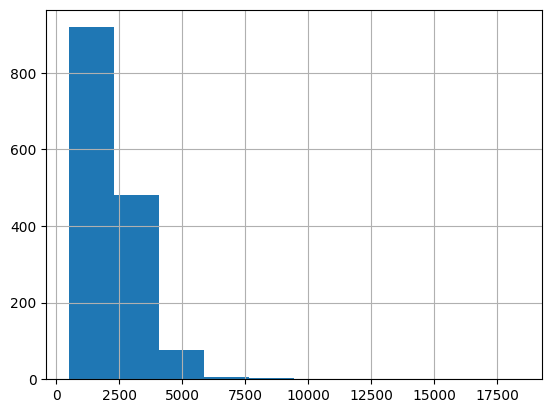

In [5]:
data['Text'].str.len().hist()

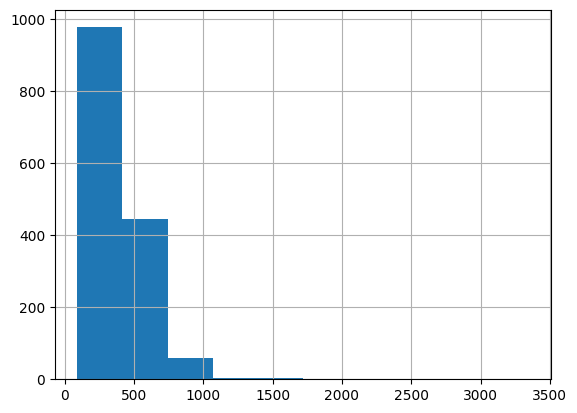

In [6]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()
plot_word_number_histogram(data['Text'])

<Axes: >

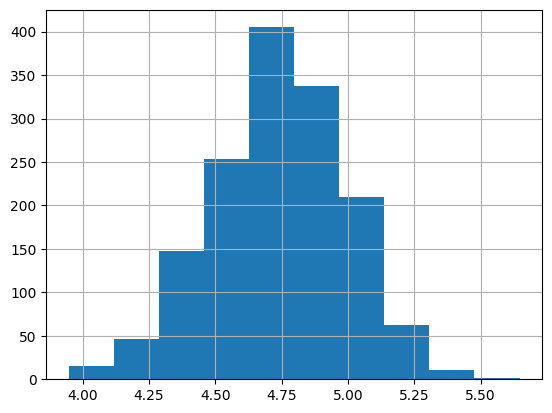

In [7]:
data['Text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

<Axes: xlabel='Category'>

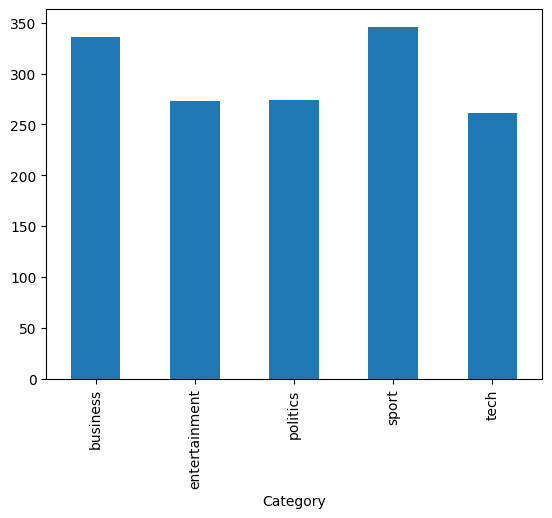

In [14]:
data.groupby('Category').ArticleId.count().plot.bar()


In [8]:
from nltk.corpus import stopwords

In [9]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oshan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
nltk.download("stopwords", quiet = True)
nltk.download("wordnet", quiet = True)
nltk.download("punkt", quiet = True)
lemmatizer = WordNetLemmatizer()
english_stopwords = set(nltk.corpus.stopwords.words('english'))

In [20]:
def preprocess_text(text):
    text = re.sub('<.*?>', '', text.lower().strip())
    text = re.sub('[^\w\s]', ' ', text)
    
    result = ''
    tokens = nltk.word_tokenize(text)
    for token in tokens:
        l = lemmatizer.lemmatize(token)
        if l not in english_stopwords:
            result += l + ' '
            
    return result

In [21]:
data['Text'] = data['Text'].apply(lambda x : preprocess_text(x))

In [22]:
data.head()

,ArticleId,Text,Category
0,1833,worldcom ex bos launch defence lawyer defendin...,business
1,154,german business confidence slide german busine...,business
2,1101,bbc poll indicates economic gloom citizen majo...,business
3,1976,lifestyle governs mobile choice faster better ...,tech
4,917,enron boss 168m payout eighteen former enron d...,business


#### Prepare for training

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Category'], test_size=0.2, random_state=42, shuffle=True)

In [26]:
def tokenizer_fit(train, n_words=1000, oov_token="<OOV>"):
    
    tokenizer = keras.preprocessing.text.Tokenizer(n_words, oov_token=oov_token)
    tokenizer.fit_on_texts(train_sentences)

    return tokenizer

In [28]:
tokenizer = tokenizer_fit(X_train)
word_index = tokenizer.word_index

NameError: name 'keras' is not defined